In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

In [2]:
snidoutput = Table.from_pandas(pd.read_csv("snid_classes_ZTFI.csv"))

In [3]:
superfit_results = Table.from_pandas(pd.read_csv(r"C:\Users\20xha\Documents\Caltech\Research\superfit\superfit\superfit_classes_ZTFI.csv"))

In [4]:
combined = astropy.table.join(superfit_results, snidoutput, keys = ["Version"])

In [5]:
sample = Table.read("C:/Users/20xha/Documents/Caltech/Research/superfit/ZTFI_data/sample/SEDM_ML_sample.ascii", format = "ascii")
sample.rename_column('col1', 'ZTF_Name')
sample.rename_column('col2', "Class")
sample.rename_column('col3', "redshift")
sample.rename_column('col8', "Version")

In [18]:
len(np.unique(sample[np.where(sample["col9"] != 2)]["ZTF_Name"]))

4723

In [6]:
final_rcf_table = Table.from_pandas(pd.read_hdf(r"C:\Users\20xha\Documents\Caltech\Research/final_rcf_table.h5"))

In [7]:
negativeIa_ztfI = 0
positiveIa_ztfI = 0
for i in np.unique(sample["ZTF_Name"]):
    all_version = sample[np.where(sample["ZTF_Name"] == i)]
    if(0 in all_version["col9"] or 1 in all_version["col9"]):
        name = all_version[0]
        if("Ia" in name["Class"]):
            positiveIa_ztfI += 1
        elif(name["Class"] != "?" and name["Class"] != "-"):
            negativeIa_ztfI += 1

In [8]:
negativeIa_ztfI

1610

In [19]:
4723 - 1690 - 385

2648

In [11]:
TypeIa_Information = Table(
                    names=("ZTF_Name", "spectra_file", "sn_type", "superfit_sn_type", "zooniverse_sn_type", "z_sn", "in_rcfI", "sn_type_rcfI", "in_marshall", "sn_type_marshall"
                    ),
                    meta={"name": "Final ZTF-I Type II Table"},
                    dtype=("U64", "U64", "U64", "U64", "U64", "float32", "bool", "U64", "bool", "U64"
                          )
                    )
for i in np.unique(combined["ZTF_Name"]):
    data = combined[np.where(combined["ZTF_Name"] == i)]
    index = []
    counter = 0
    for j in data:
        superfitII = "Ia" in j["Superfit_c"]
        zooniverseII = "Ia" in j["c_snid_1"]
        if(superfitII and zooniverseII):
            index.append(counter)
        counter += 1
    if(len(index) > 0):
        best = data[index]
        if(len(best) > 1):
            best = best[np.where(best["rlap_1"] == np.max(best["rlap_1"]))]
            if(len(best) > 1):
                best = best[0]
        col9 = sample["col9"][np.where(best["Version"] == sample["Version"])]
        if(best["rlap_1"] > 10 and (0 in col9 or 1 in col9)):
            row = [best["ZTF_Name"], best["Version"], "Ia", best["Superfit_c"], best["c_snid_1"], best["z_snid"]]
            if(i in final_rcf_table["ZTF_Name"]):
                rcfI = final_rcf_table["sn_type"][np.where(final_rcf_table["ZTF_Name"] == i)]
                row.extend([True, rcfI])
            else:
                row.extend([False, ""])

            if(i in sample["ZTF_Name"]):
                marshall = sample["Class"][np.where(sample["ZTF_Name"] == i)[0][0]]
                row.extend([True, marshall])
            else:
                row.extend([False, ""])
            TypeIa_Information.add_row(row)

In [12]:
TypeIa_Information

ZTF_Name,spectra_file,sn_type,superfit_sn_type,zooniverse_sn_type,z_sn,in_rcfI,sn_type_rcfI,in_marshall,sn_type_marshall
str64,str64,str64,str64,str64,float32,bool,str64,bool,str64
ZTF18aaaqexr,ZTF18aaaqexr_20200215_P60_v1.ascii,Ia,Ia-norm,Ia-norm,0.7297,False,,True,Ia
ZTF18aagrtxs,ZTF18aagrtxs_20180328_P60_v1.ascii,Ia,Ia-norm,Ia-norm,0.0176,True,Ia,True,Ia
ZTF18aagstdc,ZTF18aagstdc_20180402_P60_v1.ascii,Ia,Ia-norm,Ia-norm,0.0469,True,Ia,True,Ia
ZTF18aagtcxj,ZTF18aagtcxj_20180410_P200_v1.ascii,Ia,Ia 91bg-like,Ia-norm,0.0333,True,Ia,True,Ia
ZTF18aahfeiy,ZTF18aahfeiy_20180517_P200_v1.ascii,Ia,Ia-norm,Ia-norm,0.0696,True,Ia,True,Ia
ZTF18aahfgyz,ZTF18aahfgyz_20180410_P200_v1.ascii,Ia,Ia 91bg-like,Ia-91bg,0.016,True,Ia-91bg,True,Ia-91bg
ZTF18aahfxnn,ZTF18aahfxnn_20180410_P200_v1.ascii,Ia,Ia-norm,Ia-norm,0.0745,True,Ia,True,Ia
ZTF18aahfzea,ZTF18aahfzea_20180421_P60_v1.ascii,Ia,Ia-norm,Ia-norm,0.0245,True,Ia,True,Ia
ZTF18aahheaj,ZTF18aahheaj_20180414_LT_v1.ascii,Ia,Ia-norm,Ia-norm,0.0469,True,Ia,True,Ia


In [9]:
negativeIa = 0
positiveIa = 0
for name in final_rcf_table:
    if("Ia" in name["sn_type"]):
        positiveIa += 1
    else:
        negativeIa += 1

In [10]:
tp_fp_ratio = []
tp_fp_ratio_rcf = []
for rlap_num in np.linspace(0,10,21):
    TypeIa_Information = Table(
                    names=("ZTF_Name", "spectra_file", "sn_type", "superfit_sn_type", "zooniverse_sn_type", "z_sn", "in_rcfI", "sn_type_rcfI", "in_marshall", "sn_type_marshall"
                    ),
                    meta={"name": "Final ZTF-I Type II Table"},
                    dtype=("U64", "U64", "U64", "U64", "U64", "float32", "bool", "U64", "bool", "U64"
                          )
                    )
    for i in np.unique(combined["ZTF_Name"]):
        data = combined[np.where(combined["ZTF_Name"] == i)]
        index = []
        counter = 0
        for j in data:
            superfitII = "Ia" in j["Superfit_c"]
            zooniverseII = "Ia" in j["c_snid_1"]
            if(superfitII and zooniverseII):
                index.append(counter)
            counter += 1
        if(len(index) > 0):
            best = data[index]
            if(len(best) > 1):
                best = best[np.where(best["rlap_1"] == np.max(best["rlap_1"]))]
                if(len(best) > 1):
                    best = best[0]
            col9 = sample["col9"][np.where(best["Version"] == sample["Version"])]
            if(best["rlap_1"] > rlap_num and (0 in col9 or 1 in col9)):
                row = [best["ZTF_Name"], best["Version"], "Ia", best["Superfit_c"], best["c_snid_1"], best["z_snid"]]
                if(i in final_rcf_table["ZTF_Name"]):
                    rcfI = final_rcf_table["sn_type"][np.where(final_rcf_table["ZTF_Name"] == i)]
                    row.extend([True, rcfI])
                else:
                    row.extend([False, ""])

                if(i in sample["ZTF_Name"]):
                    marshall = sample["Class"][np.where(sample["ZTF_Name"] == i)[0][0]]
                    row.extend([True, marshall])
                else:
                    row.extend([False, ""])
                TypeIa_Information.add_row(row)
    counter = 0
    index_counter = 0
    index = []
    for i in TypeIa_Information["sn_type_marshall"]:
        if('Ia' not in i and '-' != i and i != 'NaN'):
            counter += 1
            index.append(index_counter)
        index_counter += 1
    tp_fp_ratio.append([(len(TypeIa_Information) - len(index)) / positiveIa_ztfI, len(index) / negativeIa_ztfI, rlap_num])

    final_rcf_test = TypeIa_Information[np.where(TypeIa_Information["in_rcfI"] == True)]
    counter = 0
    index_counter = 0
    index = []
    for i in final_rcf_test["sn_type_rcfI"]:
        if('Ia' not in i):
            counter += 1
            index.append(index_counter)
        index_counter += 1
    tp_fp_ratio_rcf.append([(len(final_rcf_test) - len(index))/ positiveIa, len(index)/negativeIa, rlap_num])

KeyboardInterrupt: 

In [18]:
tp_fp_ratio_np = np.asarray(tp_fp_ratio)
tp_fp_ratio_rcf_np = np.asarray(tp_fp_ratio_rcf)

Text(0, 0.5, 'True Positive Rate')

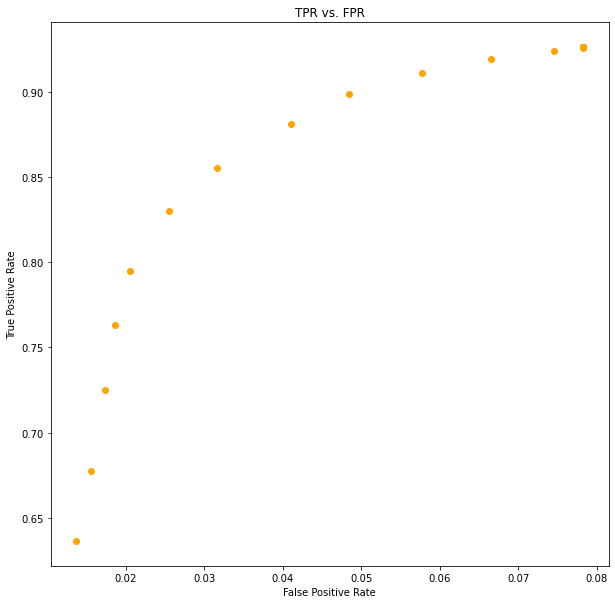

In [19]:
fig = plt.figure(figsize = (10,10))
plt.scatter(tp_fp_ratio_np[:,1], tp_fp_ratio_np[:,0], color = "orange")
plt.title("TPR vs. FPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [20]:
tp_fp_ratio_np[np.where(tp_fp_ratio_np[:,0] == np.max(tp_fp_ratio_np[tp_fp_ratio_np[:,1] < 0.005][:,0]))]

ValueError: zero-size array to reduction operation maximum which has no identity